In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn import decomposition

X1, Y1 = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)
print(X1.shape)


(100, 10)


In [20]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)

pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [21]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

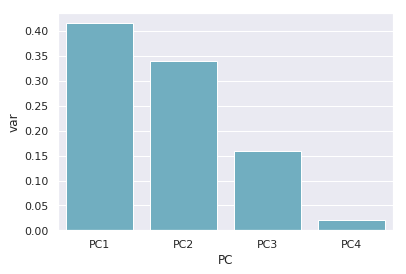

In [22]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

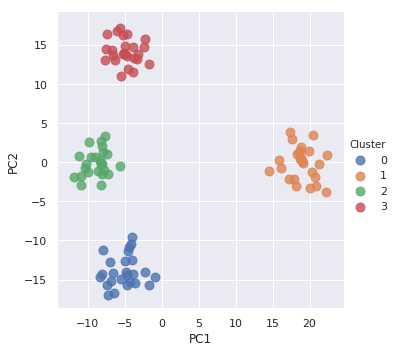

In [23]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size